In [4]:
import matplotlib.pyplot as plt
import csv
import pandas as pd
import scipy.stats as sts
import math
import os
import glob

In [95]:
def plot_all(dfs, key='Perf'):
    n_runs = len(dfs)
    print(n_runs, ' runs')
    for df in dfs:
        value = df[key]
        plt.plot(range(len(value)), value)
        plt.xlabel('Iterations')
        plt.ylabel(key)
    plt.show()

def moments(dfs):
    cdf = pd.concat(dfs, sort=True).groupby(level=0)
    return cdf.mean(), cdf.std().fillna(0)
    
def plot_ci(dfs, key='Perf', conf=0.95):
    n_runs = len(dfs)
    print(n_runs, ' runs')
    mean_df, std_df = moments(dfs)
    mean = mean_df[key]
    std = std_df[key]
    plt.plot(range(len(mean)), mean)
    interval = sts.t.interval(conf, n_runs-1,loc=mean,scale=std/math.sqrt(n_runs))
    plt.fill_between(range(len(mean)), interval[0], interval[1], alpha=0.3)
    plt.show()

def load_all(name):
    return [pd.read_csv(file, index_col=False) for file in glob.glob("*.csv") if file.startswith(name + '_')]
    

In [90]:
os.chdir('../logs/')

In [91]:
dfs = load_all('balanced')

5  runs


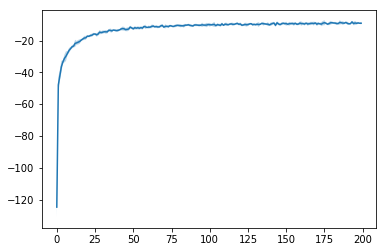

In [96]:
plot_ci(dfs, 'Perf')

5  runs


/home/matteo/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1910: RuntimeWarning: invalid value encountered in multiply
  lower_bound = self.a * scale + loc
/home/matteo/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1911: RuntimeWarning: invalid value encountered in multiply
  upper_bound = self.b * scale + loc


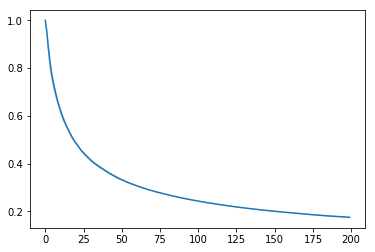

In [99]:
plot_ci(dfs, 'Exploration')